In [3]:
!pip install pywaterflood

  Using cached pywaterflood-0.3.0-cp37-abi3-win_amd64.whl (149 kB)


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import *

import pywaterflood.pywaterflood as pwf

In [38]:
plt.style.use('bmh')

In [5]:
# For multiple table viewing
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:left"><td style="vertical-align:top">'
        html_str+=f'<h3 style="text-align: left;">{title}</h3>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

<h3><b>1. Data Preprocessing</b></h3>
<p>Here, we process data for better understanding of the structure and plan out the things we need to do toward the data.</p>

In [6]:
df = pd.read_excel("D:/crmProject/dataSamples/Volve/volveData.xlsx")
df.head(10)

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE,TOTAL_LIQ_VOL
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI,0.0
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP,0.0
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP,0.0
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP,0.0
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP,0.0
5,2014-04-12,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.50078,...,22.05334,8.70429,22.05334,0.0,0.0,0.0,NaN,production,OP,0.0
6,2014-04-13,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.53481,...,27.50281,9.42315,16.16326,0.0,0.0,0.0,NaN,production,OP,0.0
7,2014-04-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.78228,...,20.99552,8.13137,20.73712,0.0,0.0,0.0,NaN,production,OP,0.0
8,2014-04-15,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.85821,...,13.91754,8.49833,12.18153,0.0,0.0,0.0,NaN,production,OP,0.0
9,2014-04-16,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.79187,...,4.11994,8.82124,1.49020,0.0,0.0,0.0,NaN,production,OP,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

In [8]:
df['DATEPRD'].max()

Timestamp('2016-12-01 00:00:00')

<h3><b>2. Data Analysis</b></h3>
<p>This part is needed to clean and sort the data based on the wanted format of data. Some things that we do are:<br><br>
1. Sorting the data based on <b>DATEPRD</b>.<br>
2. Clean the data and fill the NaN with either zeros or other methods.<br>
3. Sort the data based on well names.</p><br>

In [9]:
dfSorted = df.sort_values(by='DATEPRD')

In [10]:
dfFinal = dfSorted.filter(['NPD_WELL_BORE_NAME','ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE','BORE_OIL_VOL', 'BORE_GAS_VOL','BORE_WAT_VOL','BORE_WI_VOL'])

dfFinal.head()

,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
12328,15/9-F-5,NaN,NaN,NaN,NaN,NaN,NaN
9001,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN
12329,15/9-F-5,NaN,NaN,NaN,NaN,NaN,NaN
9002,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN
9003,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN


D:\crmProject\crmp_code_test\proxy_crm\.env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\crmProject\crmp_code_test\proxy_crm\.env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_21764\2149377661.py:24: UserWarning: The figure layout has changed to tight
  grid_prod.fig.tight_layout()


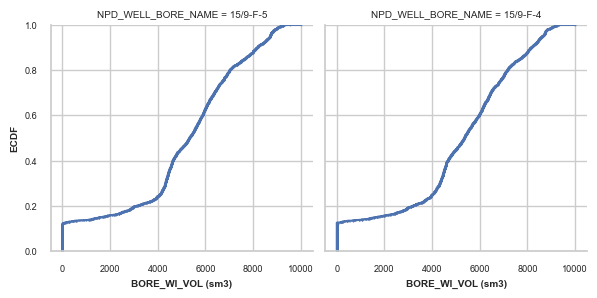

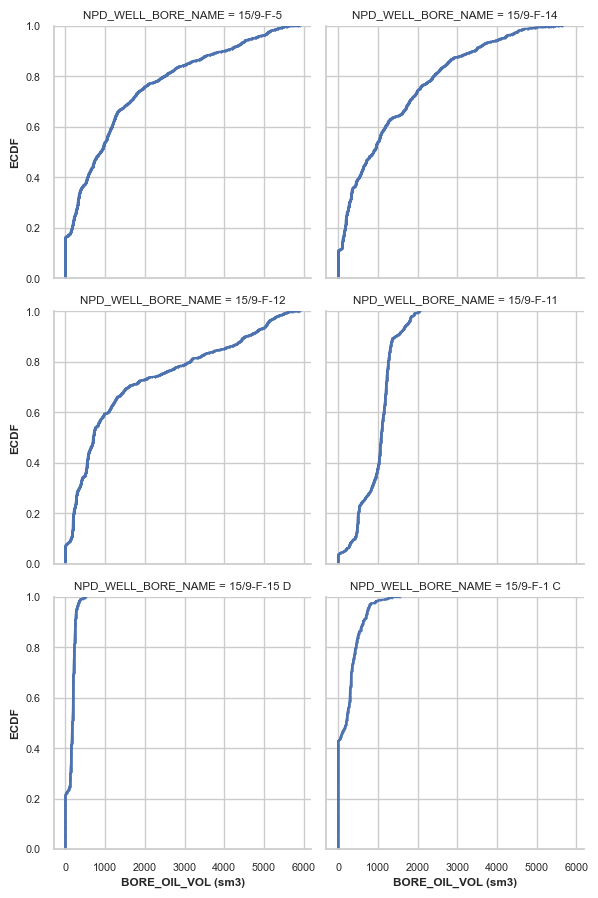

In [40]:
prodName = ['15/9-F-1 C','15/9-F-11','15/9-F-12','15/9-F-14','15/9-F-15 D', '15/9-F-5']
injName = ['15/9-F-4','15/9-F-5']

#ecdf
def ecdf_plot(x, **kwargs):
    sns.ecdfplot(x, marker='.', **kwargs)

%config InlineBackend.figure_format = 'png'

grid_inj = sns.FacetGrid(dfFinal[dfFinal['NPD_WELL_BORE_NAME'].isin(injName)], col='NPD_WELL_BORE_NAME', col_wrap=2, height=3)
grid_inj.map(ecdf_plot, 'BORE_WI_VOL')
for ax in grid_inj.axes.flat:
    ax.set_xlabel('BORE_WI_VOL (sm3)', fontweight='bold')
    ax.set_ylabel('ECDF', fontweight='bold')
sns.set_theme(style='whitegrid', font_scale=0.7, rc={"lines.markersize": 0.5})

grid_prod = sns.FacetGrid(dfFinal[dfFinal['NPD_WELL_BORE_NAME'].isin(prodName)], col='NPD_WELL_BORE_NAME', col_wrap=2, height=3)
grid_prod.map(ecdf_plot, 'BORE_OIL_VOL')
for ax in grid_prod.axes.flat:
    ax.set_xlabel('BORE_OIL_VOL (sm3)', fontweight='bold')
    ax.set_ylabel('ECDF', fontweight='bold')
sns.set_theme(style='whitegrid', font_scale=0.6, rc={"lines.markersize": 0.5})

grid_prod.fig.tight_layout()

In [13]:
#fill NaN
dfFinal['ON_STREAM_HRS'] =dfFinal['ON_STREAM_HRS'].fillna(method='pad').fillna(method='bfill')
dfFinal['AVG_DOWNHOLE_PRESSURE'] =dfFinal['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad').fillna(method='bfill')
dfFinal['BORE_OIL_VOL'] =dfFinal['BORE_OIL_VOL'].fillna(method='pad').fillna(method='bfill')
dfFinal['BORE_GAS_VOL'] =dfFinal['BORE_GAS_VOL'].fillna(method='pad').fillna(method='bfill')
dfFinal['BORE_WI_VOL'] = dfFinal['BORE_WI_VOL'].fillna(method='pad').fillna(method='bfill')
dfFinal['BORE_WAT_VOL'] =dfFinal['BORE_WAT_VOL'].fillna(method='pad').fillna(method='bfill')

In [14]:
dfFinal.head()

,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
12328,15/9-F-5,0.0,0.0,0.0,0.0,0.0,0.0
9001,15/9-F-4,0.0,0.0,0.0,0.0,0.0,0.0
12329,15/9-F-5,0.0,0.0,0.0,0.0,0.0,0.0
9002,15/9-F-4,0.0,0.0,0.0,0.0,0.0,0.0
9003,15/9-F-4,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#create prod, inj, time, and BHP dataframe
prod = pd.DataFrame()
inj = pd.DataFrame()
time = pd.DataFrame(dfFinal['ON_STREAM_HRS'].reset_index()).drop('index', axis=1)
bhp = pd.DataFrame(dfFinal['AVG_DOWNHOLE_PRESSURE'].reset_index()).drop('index', axis=1)

prod['time'] = dfFinal['ON_STREAM_HRS'].reset_index().drop('index', axis=1)
for i_prod in range(len(prodName)):
    if dfFinal.NPD_WELL_BORE_NAME.isin([prodName[i_prod]]).any():
        prod[f'P{i_prod+1}'] = (dfFinal['BORE_OIL_VOL'].values + dfFinal['BORE_WAT_VOL'].values + dfFinal['BORE_GAS_VOL'].values)

inj['time'] = dfFinal['ON_STREAM_HRS'].reset_index().drop('index', axis=1)
for i_inj in range(len(injName)):
    if dfFinal.NPD_WELL_BORE_NAME.isin([injName[i_inj]]).any():
        inj[f'I{i_inj+1}'] = dfFinal['BORE_OIL_VOL'].values + dfFinal['BORE_WAT_VOL'].values + dfFinal['BORE_GAS_VOL'].values

In [42]:
inj.head()

,time,I1,I2
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


KeyError: 'I1'

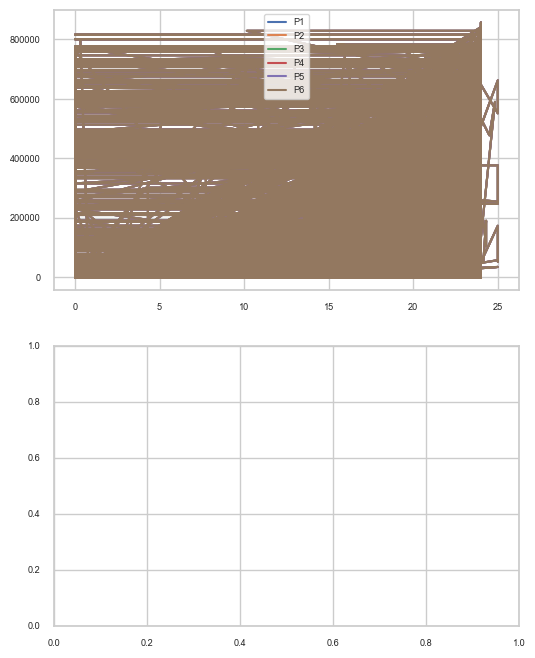

In [44]:
fig, ax = plt.subplots(2,1, figsize=(6,8))

for j in range(1, prod.shape[1]):
  ax[0].plot(prod['time'], prod[f'P{j}'], label=f'P{j}')
ax[0].legend()


for i in range(1, inj.shape[1]):
  ax[1].plot(prod['time'], prod[f'I{i}'], label=f'I{i}')

ax[1].legend()

plt.show()

In [48]:
display_side_by_side(inj.head(10),prod.head(10),time.head(10), bhp.head(10), titles=['Well Injection','Well Production','Time','Bottomhole Pressure'])

,I1,I2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [49]:
prod.dtypes

P1    float64
P2    float64
P3    float64
P4    float64
P5    float64
P6    float64
dtype: object

<h3><b>Apply CRM Model</b></h3>
<p>In this part, there are several cases that will be tackled using proxy-CRM model from proxyCRM_modules:<br><br>
1. <b>Case 1</b>: No shut-in well case.<br>
2. <b>Case 2</b>: One and multiple shut-in case.<br>
3. <b>Case 3</b>: One and multiple shut-in and well treatment case.</p><br>

ngetes aja

In [21]:
data_src = "D:/crmProject/dataSamples/pywaterflood-master/testing/data/"
prodTest = pd.read_csv(data_src + "production.csv", header= None)
injTest = pd.read_csv(data_src + "injection.csv", header=None)
timeTest = pd.read_csv(data_src + "time.csv", header= None)

"""crm = CRM(tau_selection="per-pair", constraints="up-to one")
crm.fit(prod.values, inj.values, time.values[:, 0])
q_hat = crm.predict()"""

'crm = CRM(tau_selection="per-pair", constraints="up-to one")\ncrm.fit(prod.values, inj.values, time.values[:, 0])\nq_hat = crm.predict()'

In [23]:
pCRM = pCRM.proxyCRM()
pCRM.fit(prodTest.values, injTest.values, timeTest.values[:, 0])

AttributeError: 'proxyCRM' object has no attribute 'proxyCRM'